# Ćwiczenia 10

## Programowanie dla analizy danych

2018/2019, semestr letni

---

## 1

Podana niżej funkcja `liczba_wejść()` wykorzystuje moduł [`requests`](http://docs.python-requests.org/en/master/) oraz [Wikimedia API](https://wikimedia.org/api/rest_v1/) do tworzenia list z dziennymi liczbami wejść na dane hasło polskiej Wikipedii w zadanych okresach czasu.

_Przykład:_ wywołanie
```python
liczba_wejść('Maria Skłodowska-Curie', '20180601', '20180606')
```
zwraca listę
```python
[('20180601', 946),
 ('20180602', 1178),
 ('20180603', 2096),
 ('20180604', 2478),
 ('20180605', 2633),
 ('20180606', 2714)]
```

**Uwaga:** Każde wywołanie funkcji `liczba_wejść()` oznacza nowe żądanie wygenerowania tabeli. To może obciążać serwer. Kolejne wywołania rozdzielaj kilkusekundowym odstępem, wyniki zwracane przez funkcję zapamiętuj w zmiennych.

In [1]:
import requests

BASE = 'https://wikimedia.org/api/rest_v1'
SZABLON = '/metrics/pageviews/per-article/{project}/{access}/{agent}/{article}/{granularity}/{start}/{end}'
URL = BASE + SZABLON
wartości = {'project': 'pl.wikipedia.org',
            'access': 'all-access',
            'agent': 'user',
            'article': '',
            'granularity': 'daily',
            'start': '',
            'end': ''}

def timestamp_views(d):
    if 'views' in d.keys():
        # W timestamp porzucana jest wartość godziny.
        return d['timestamp'][:-2], d['views']
    else:
        return d

def liczba_wejść(hasło, start, stop):
    '''Zwraca tabelę z liczbą dziennych wejść na stronę hasła
    w polskiej Wikipedii w okresie [start, stop].
    
    Wykorzystuje API:
    https://wikimedia.org/api/rest_v1/
    
    Parametry:
    hasło -- nazwa hasła, litery duże i małe są odróżnianie,
    start, stop -- daty w formacie YYYYMMDD.
    
    Zwracana tabela ma postać listy krotek 
    (<data>, <liczba wejść>)
    '''
    
    wartości['article'] = hasło
    wartości['start'] = start + '00'
    wartości['end'] = stop + '00'
    url = URL.format(**wartości)
    odpowiedź = requests.get(url)
    
    if odpowiedź.status_code == 200:
        d = odpowiedź.json(object_hook=timestamp_views)
        return d['items']

### 1.1

Zapamiętaj w zmiennej tabelę z liczbą wejść na stronę hasła Python w roku 2017.

In [2]:
python=[]
python=liczba_wejść('Python', '20170101', '20171231')

### 1.2

Ile było wszystkich wejść na stronę z hasłem Python w 2017 roku?

In [26]:
suma=0
for i in range(int(len(python))):
    suma+=python[i][1]
print(suma)

108622


### 1.3

Którego dnia było tych wejść najwięcej, a którego najmniej?

In [59]:
maxim=0
date=0
for i in range(int(len(python))):
    if (python[i][1] > maxim):
        maxim,date=python[i][1],python[i][0]
print ("{}-{}-{}".format(date[:4],date[4:6],date[6:8]))     

2017-01-29


---
## 2

### 2.1

Lista ze statystyką wejść na stronę zawiera krotki o dwóch pozycjach -- z datą i liczbą odsłon. Wartość z liczbą odsłon jest liczbą całkowitą i to jest OK. Niestety, data jest łańcuchem, co nie jest w tym przypadku wygodnym formatem, gdyż utrudnia wykonywanie porównań i obliczeń. Aby poradzić sobie z tym problemem wykorzystamy moduł [`datetime`](https://pymotw.com/3/datetime/index.html). 

Funkcja
```python
datetime.datetime.strptime(s, schemat)
```
zamienia datę z łańcucha `s` na obiekt typu `datetime.datetime`, czyli obiekt pythonowy reprezentujący datę. Parametr `schemat` jest łańcuchem -- podpowiada on w jaki sposób data została zakodowana w łańcuchu `s`. Pełną tabelę z kodami dla parametru `schemat` znajdziesz [tutaj](https://docs.python.org/3/library/datetime.html#strftime-strptime-behavior), nam jednak wystarczy następujący jej fragment:

Kod | Znaczenie
--- | ---
`%Y` | Rok jako czterocyfrowa liczba dziesiętna.
`%m` | Miesiąc jako dwucyfrowa liczba dziesiętna.
`%d` | Dzień jako dwucyfrowa liczba dziesiętna.
`%A` | Pełna nazwa dnia tygodnia.
`%B` | Pełna nazwa miesiąca.

_Przykład:_ wywołanie
```python
datetime.datetime.strptime('20-05-2018', '%d-%m-%Y')
```
zwraca
```python
datetime.datetime(2018, 5, 20, 0, 0)
```

Zamień podane niżej daty na daty pythonowe używając powyższej funkcji i odpowiedniego schematu:

* `20-05-2018`
* `2018-05-20`
* `20180520`
* `20.05.2018`

In [65]:
import datetime
print(datetime.datetime.strptime('20-05-2018', '%d-%m-%Y'))
print(datetime.datetime.strptime('2018-05-20', '%Y-%m-%d'))
print(datetime.datetime.strptime('20180520', '%Y%m%d'))
print(datetime.datetime.strptime('20.05.2018', '%d.%m.%Y'))

2018-05-20 00:00:00
2018-05-20 00:00:00
2018-05-20 00:00:00
2018-05-20 00:00:00


### 2.2

Napisz klasę `TabelaOdsłon`. Obiekty tej klasy reprezentują tabelę z dziennymi liczbami odsłon hasła w danym okresie czasu. Funkcja `liczba_wejść()` powinna być używana tylko przez `__init__()` i tylko raz. 

Metody:

* `__init__(self, hasło, start, stop)` -- inicjalizuje obiekt korzystając (tylko jeden raz!) z funkcji `liczba_wejść()`. 
* `__str__(self)` -- zwraca łańcuch postaci
  ```
  Tabela dziennych odsłon dla hasła <hasło> za okres [<start>, <stop>].
  ```
* `__repr__(self)` -- zwraca łańcuch postaci
  ```
  TabelaOdsłon(<hasło>, <start>, <stop>)
  ```
  Wartości `start` i `stop` muszą być w formacie akceptowalnym przez klasę czyli `YYYYMMDD`.
* `__len__(self)` -- zwraca długość listy z liczbami wejść.
* `daty(self)` -- krotka kolejnych dat typu `datetime.datetime`.
* `odsłony(self)` -- krotka z liczbami odsłon.

In [303]:
class TabelaOdsłon:
    def __init__(self,hasło,start,stop):
        self.hasło=hasło
        self.start=start
        self.stop=stop
        self.values=liczba_wejść(hasło, start, stop)
    
    def __str__(self):
        return ("Tabela dziennych odsłon dla hasła <{}> za okres [<{}>, <{}>].").format(self.hasło, self.start, self.stop)
        
    def __repr__(self):
        return ("TabelaOdsłon(<{}>, <{}>, <{}>)").format(self.hasło, self.start, self.stop)
    
    def __len__(self):
        return len(self.values)
    
    def daty(self):
        krotka=[]
        for i in range(len(self.values)):
            krotka.append(self.values[i][0])
        return krotka   
    
    def odsłony(self):
        krotka=[]
        for i in range(len(self.values)):
            krotka.append(self.values[i][1])
        return krotka   
    
    
from functools import wraps # This convenience func preserves name and docstring    
def add_method(cls):
    def decorator(func):
        @wraps(func) 
        def wrapper(self, *args, **kwargs): 
            return func(*args, **kwargs)
        setattr(cls, func.__name__, wrapper)
        # Note we are not binding func, but wrapper which accepts self but does exactly the same as func
        return func # returning func means func can still be used normally
    return decorator
       
    

#### Test rysunkowy

In [304]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('seaborn-notebook')
#len(TabelaOdsłon('Python', '20170601', '20171231'))

In [305]:
def porównaj_wykresy(tab1, tab2, rozmiar=(16, 9)):
    X, Y = tab1.daty(), tab1.odsłony()
    Z = tab2.odsłony()
    
    if tab2.daty() != X:
        raise NotImplementedError('Zakresy dat są różne.')
        
    plt.figure(figsize=rozmiar)
    plt.plot(X, Y, label=tab1.hasło)
    plt.plot(X, Z, label=tab2.hasło)
    plt.fill_between(X, Y, Z, alpha=0.2, color='g')
    plt.legend()
    plt.grid(ls=':')

In [306]:
python = TabelaOdsłon('Python', '20170601', '20171231')

In [307]:
java = TabelaOdsłon('Java', '20170601', '20171231')

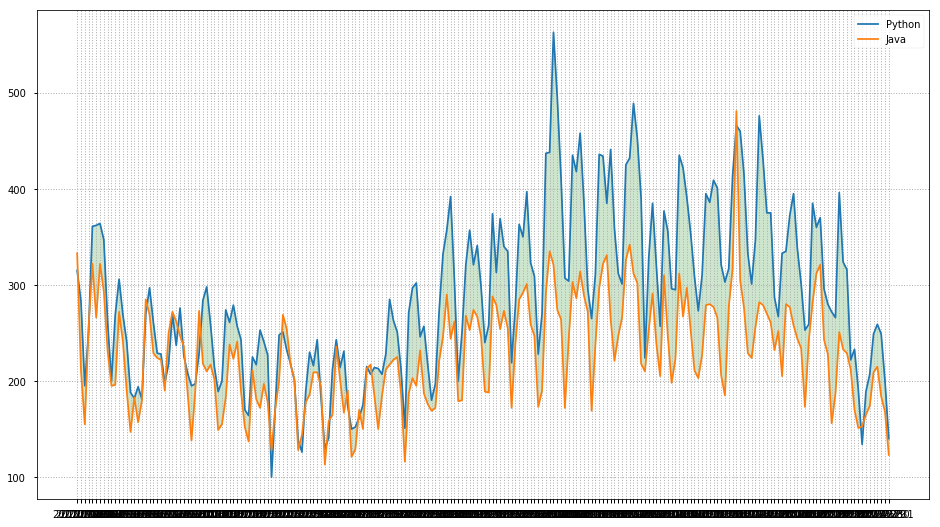

In [308]:
porównaj_wykresy(python, java)

In [309]:
lament = TabelaOdsłon('Lament świętokrzyski', '20180101', '20181231')

In [310]:
stepy = TabelaOdsłon('Stepy akermańskie', '20180101', '20181231')

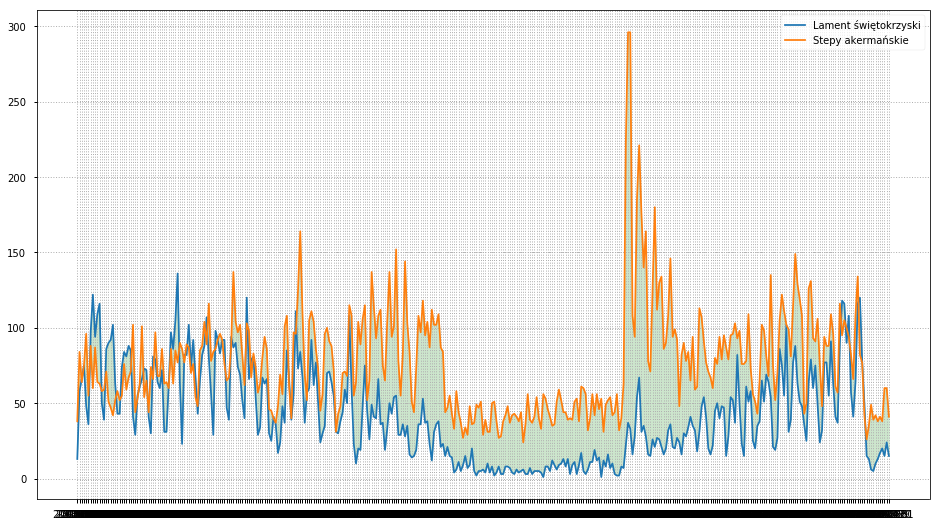

In [311]:
porównaj_wykresy(lament, stepy)

### 2.3

Dopisz do klasy metody:

* `suma(self)` -- suma liczby odsłon z wszystkich dni.
* `średnia(self)` -- średnia arytmetyczna z liczby odsłon.
* `odchylenie_standardowe(self)` -- odchylenie standardowe z liczby odsłon.
* `wariancja(self)` -- wariancja z liczby odsłon.
* `mediana(self)` -- mediana z liczby odsłon.

Do obliczenia wartości statystycznych możesz użyć moduł `statistics`.

In [312]:
import statistics
@add_method(TabelaOdsłon)
def suma(self):
    lista=[]
    for i in len(self.values):
        lista.append(self.values[i][1])
    return sum(lista)

@add_method(TabelaOdsłon)
def średnia(self):
    lista=[]
    for i in len(self.values):
        lista.append(self.values[i][1])
    return mean(lista)

@add_method(TabelaOdsłon)
def odchylenie_standardowe(self):
    lista=[]
    for i in len(self.values):
        lista.append(self.values[i][1])
    return stddev(lista)    

@add_method(TabelaOdsłon)
def wariancja(self):
    lista=[]
    for i in len(self.values):
        lista.append(self.values[i][1])
    return variance(lista) 

@add_method(TabelaOdsłon)
def mediana(self):
    lista=[]
    for i in len(self.values):
        lista.append(self.values[i][1])
    return median(lista) 

### 2.4

Dopisz do klasy metodę `w_dniach_tygodnia(self)`. Metoda zwraca słownik par `dzień_tygodnia: liczba_odsłon`, gdzie
* `dzień_tygodnia` to jeden z łańcuchów `'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'`,
* `liczba_odsłon` -- suma odsłon w danym dniu tygodnia i w danym okresie.

Nazwę dnia tygodnia, w którym wypada obiekt `data` typu `datetime.datetime` uzyskasz stosując metodę `strftime()` i kody zdefiniowane w tabeli w punkcie 2.1.

Na przykład wywołanie
```python
data = datetime.datetime.strptime('20180318', '%Y%m%d')
print(data.strftime('%A'), data.strftime('%B'))
```
wyświetla
```
Sunday March
```

In [313]:
a = TabelaOdsłon('Lament świętokrzyski', '20180101', '20181231')

@add_method(TabelaOdsłon)
def foo():
    print('hello world!')
    
a.suma()

TypeError: suma() missing 1 required positional argument: 'self'

#### Wykres słupkowy

In [ ]:
lament = TabelaOdsłon('Lament świętokrzyski', '20180101', '20181230')
d = lament.w_dniach_tygodnia()
dni_tygodnia = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
odsłony = [d[dzień] for dzień in dni_tygodnia]
plt.bar(dni_tygodnia, odsłony);